In [1]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *

In [2]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x25()

In [4]:
random_seed = 123

In [5]:
network = HopfieldNetwork(LearningRule.Oja, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
T_Oja = network.get_weights(0.001, 100)

In [6]:
print(T_Oja)

[[-0.00348977  0.00346471  0.00165277 ...  0.00115419  0.00296613
   0.00611023]
 [ 0.00346471 -0.00197968  0.00480209 ... -0.00259583  0.0002224
   0.00346471]
 [ 0.00165277  0.00480209  0.00018238 ...  0.00350106 -0.00147923
   0.00165277]
 ...
 [ 0.00115419 -0.00259583  0.00350106 ...  0.00108682  0.00458993
   0.00115419]
 [ 0.00296613  0.0002224  -0.00147923 ...  0.00458993 -0.00330844
   0.00296613]
 [ 0.00611023  0.00346471  0.00165277 ...  0.00115419  0.00296613
  -0.00348977]]


Model convergence at 1000 iter
Accuracy synchronous: 1.0


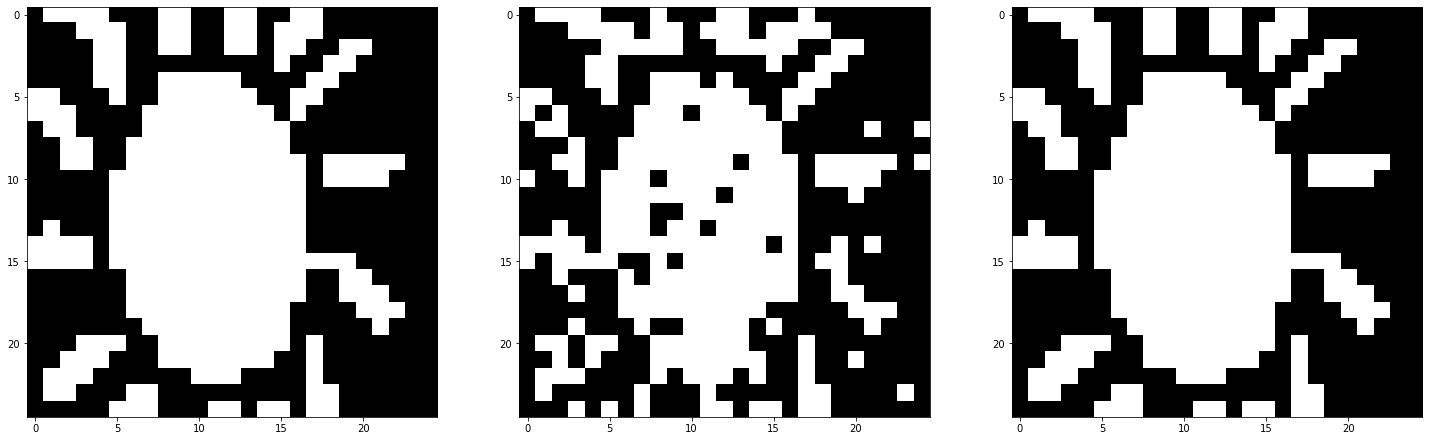

Model convergence at 1000 iter
Accuracy synchronous: 1.0


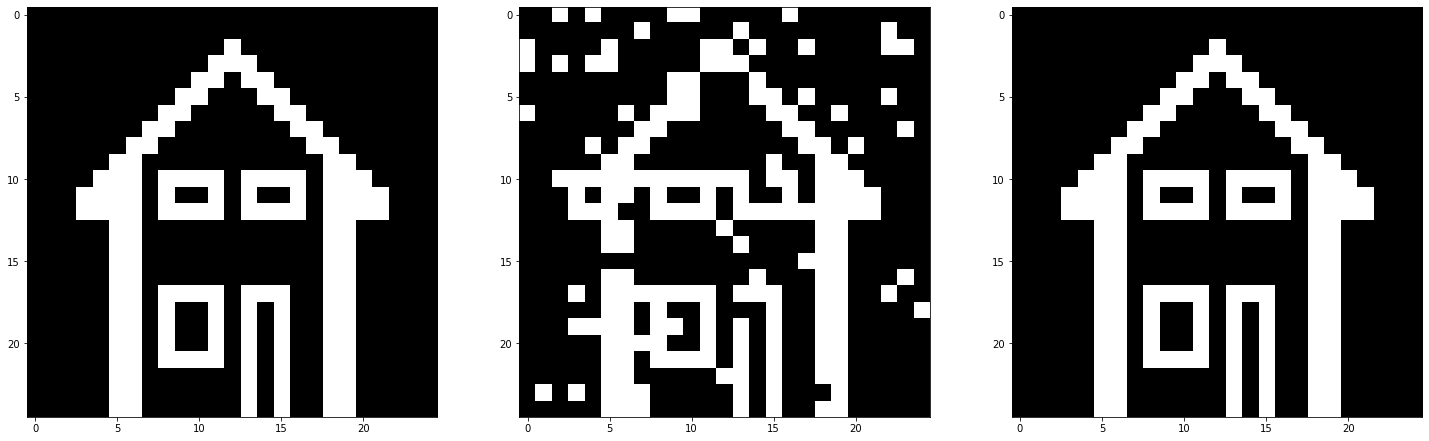

Model convergence at 1000 iter
Accuracy synchronous: 1.0


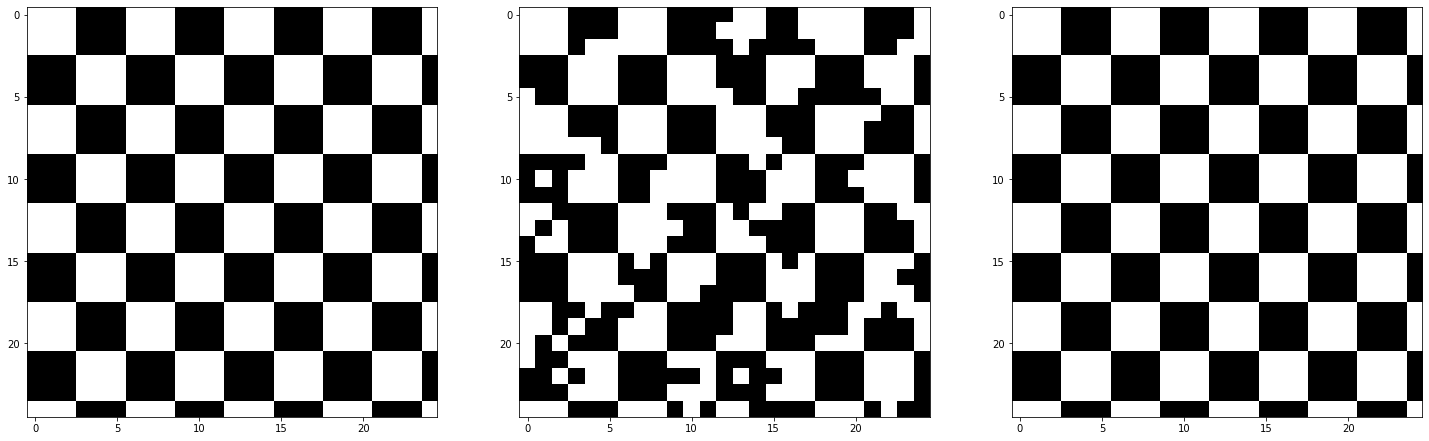

Model convergence at 1000 iter
Accuracy synchronous: 1.0


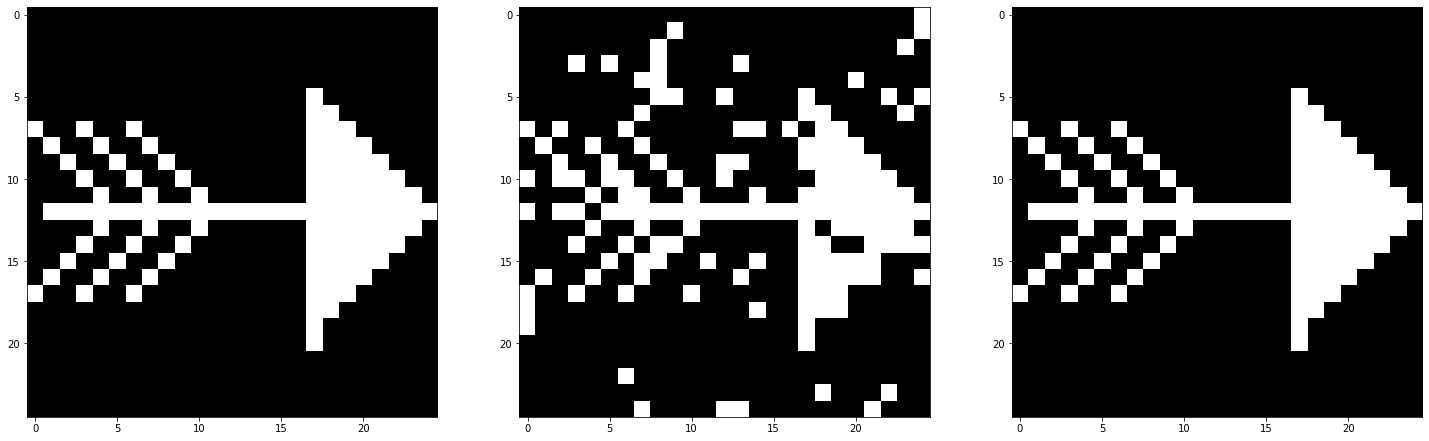

Model convergence at 1000 iter
Accuracy synchronous: 1.0


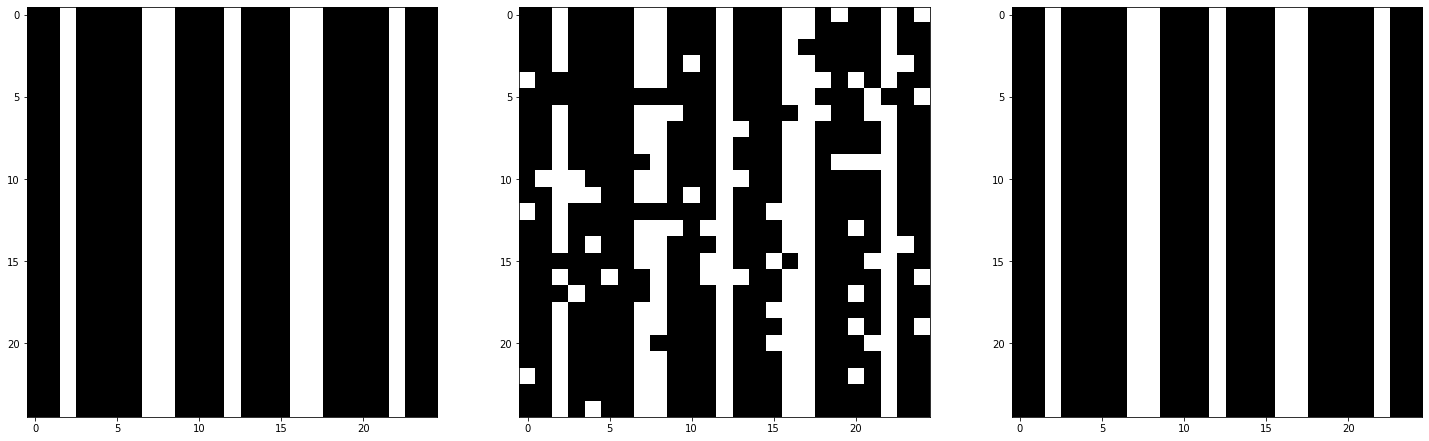

Model convergence at 1000 iter
Accuracy synchronous: 1.0


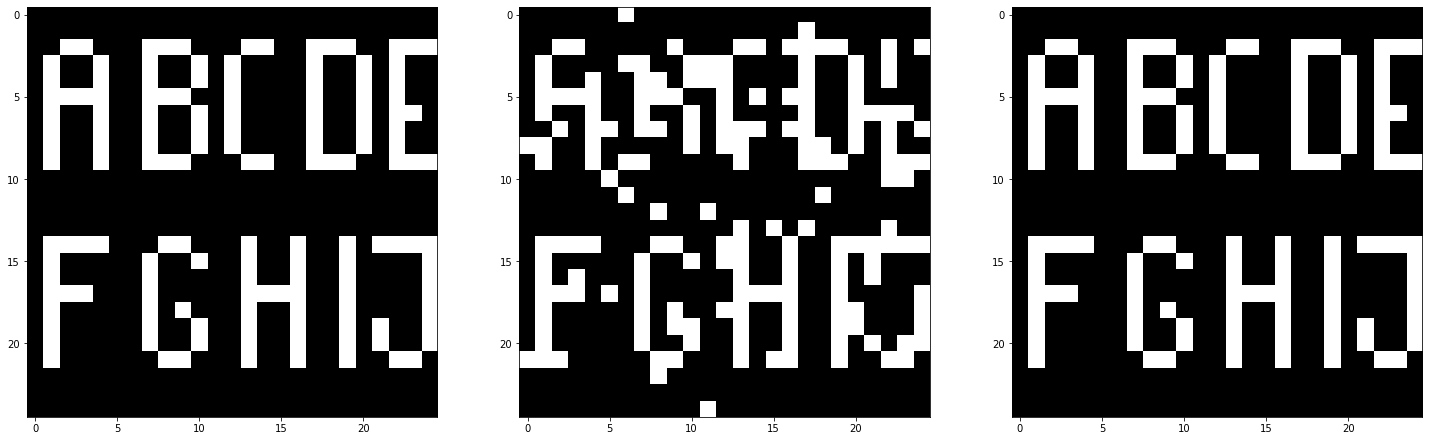

In [8]:
random_generator = np.random.default_rng(seed=random_seed)
for i in range(0, sample_count_m):
    sample_id = i
    noise_percentage = 0.1
    noise_changes_count = int(noise_percentage * neurons_count_n)

    sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
    sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)

    network.set_mode(Mode.Synchronous)
    result_synchronous = network.recognize(T_Oja, np.copy(sample_test), 1000)
    print("Accuracy synchronous: {0}".format(np.sum(sample == result_synchronous) / neurons_count_n))
    visualize_result(sample, sample_test, result_synchronous, height, width)
    plt.show()

In [13]:
def get_weights_matrix_oja_rule(w, nu, iter_count, eps=1e-14):
    t = np.copy(w)

    X = data
    m = sample_count_m
    for it in range(iter_count):
        for i in range(m):
            x = X[:, i]
            t_prev = np.copy(t)
            y = np.matmul(x, t)
            t += nu * np.outer(y, (x - np.matmul(y, t)))
            if np.linalg.norm(t - t_prev) < eps:
                break
    return t

In [10]:
network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
T_Hebb = network.get_weights()
# T_Oja = network.get_weights(0.001, 100)

In [11]:
T_Hebb

array([[0.    , 0.0064, 0.0032, ..., 0.0032, 0.0064, 0.0096],
       [0.0064, 0.    , 0.0064, ..., 0.    , 0.0032, 0.0064],
       [0.0032, 0.0064, 0.    , ..., 0.0032, 0.    , 0.0032],
       ...,
       [0.0032, 0.    , 0.0032, ..., 0.    , 0.0064, 0.0032],
       [0.0064, 0.0032, 0.    , ..., 0.0064, 0.    , 0.0064],
       [0.0096, 0.0064, 0.0032, ..., 0.0032, 0.0064, 0.    ]])

In [14]:
T_Oja = get_weights_matrix_oja_rule(T_Hebb, 0.001, 100)
T_Oja

array([[-0.00348977,  0.00346471,  0.00165277, ...,  0.00115419,
         0.00296613,  0.00611023],
       [ 0.00346471, -0.00197968,  0.00480209, ..., -0.00259583,
         0.0002224 ,  0.00346471],
       [ 0.00165277,  0.00480209,  0.00018238, ...,  0.00350106,
        -0.00147923,  0.00165277],
       ...,
       [ 0.00115419, -0.00259583,  0.00350106, ...,  0.00108682,
         0.00458993,  0.00115419],
       [ 0.00296613,  0.0002224 , -0.00147923, ...,  0.00458993,
        -0.00330844,  0.00296613],
       [ 0.00611023,  0.00346471,  0.00165277, ...,  0.00115419,
         0.00296613, -0.00348977]])

In [17]:
random_generator = np.random.default_rng(seed=random_seed)
sample_id = 1
noise_percentage = 0.1
noise_changes_count = int(noise_percentage * neurons_count_n)

sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)

Model convergence at 1000 iter
Accuracy synchronous: 1.0


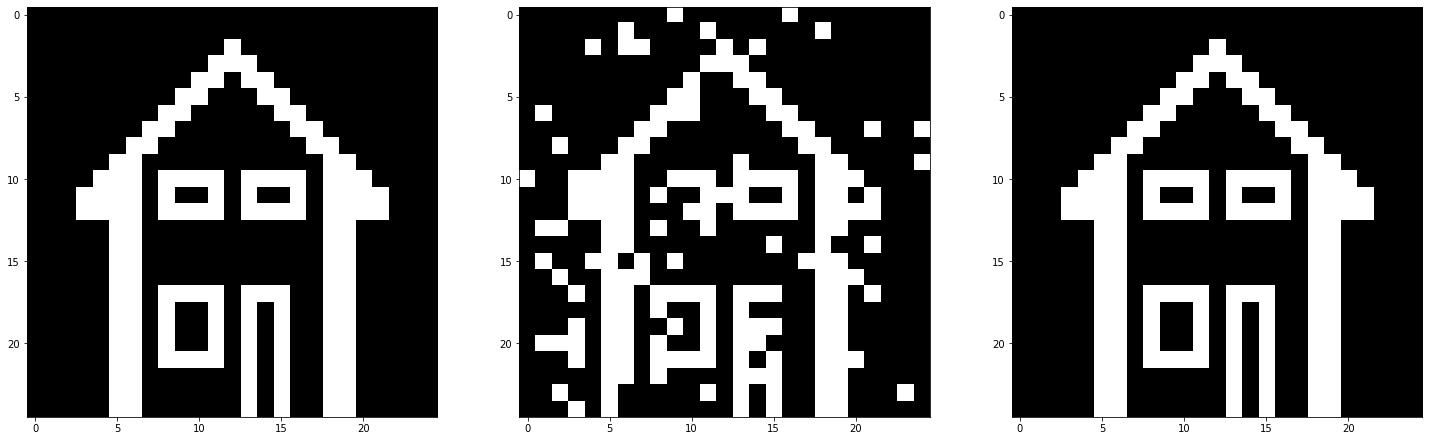

In [18]:
network.set_mode(Mode.Synchronous)
result_synchronous = network.recognize(T_Oja, np.copy(sample_test), 1000)
print("Accuracy synchronous: {0}".format(np.sum(sample == result_synchronous) / neurons_count_n))
visualize_result(sample, sample_test, result_synchronous, height, width)
# plt.show()

In [ ]:
def get_weights_matrix_oja_rule_sec(w, nu, iter_count, eps=1e-14):
        t = self._get_weights_matrix_hebb_rule()

        X = self.X
        m = self.vectors_count
        n = self.neurons_count

        curr_iter = 0
        while curr_iter < 1:
            curr_iter += 1
            t_prev = np.copy(t)
            for k in range(0, m):
                x_k = X[:, k]
                y_k = np.matmul(t, x_k)
                print(y_k.shape)
                for i in range(n):
                    p = np.multiply(y_k[i], t[i, :])
                    # print(p.shape)
                    diff = x_k - p

                    # print(diff.shape)
                    t[i, :] += nu * np.matmul(y_k[i], diff)
                    # for j in range(n):
                    #     t[i, j] = nu * y_k[i] * (x_k[j] - y_k[i] * t[i, j])

            if np.linalg.norm(t - t_prev) < eps:
                break
        # TODO - czy zerować wagi na głównej przekątnej?
        # np.fill_diagonal(t, 0)
        return t

In [43]:
def trainOja(W, data, u = 0.0001, iter = 100, showWeights = False):

    for it in range(iter):
#         print(it)
        Wprev = W.copy()
        for k in range(sample_count_m):
            x = data[:, k]
#             x = (x+1)/2
            y = np.matmul(x, W)
            for i in range(neurons_count_n):
                    W[i,:] += u*(y[i]*x[:] - W[i,:]*(y[i]**2))

        if np.linalg.norm(Wprev - W) < 1e-14:
            break 

In [44]:
t = T_Hebb.copy()
trainOja(t, data)
t

array([[0.05269871, 0.04324548, 0.02339413, ..., 0.02717059, 0.04702195,
        0.05269871],
       [0.0505008 , 0.0531398 , 0.03383294, ..., 0.02474683, 0.04405373,
        0.0505008 ],
       [0.05747804, 0.06963316, 0.06862941, ..., 0.04430958, 0.04526618,
        0.05747804],
       ...,
       [0.05852696, 0.04471447, 0.03850713, ..., 0.06080304, 0.06702515,
        0.05852696],
       [0.0499204 , 0.03998204, 0.01959679, ..., 0.03310823, 0.05349348,
        0.0499204 ],
       [0.05269871, 0.04324548, 0.02339413, ..., 0.02717059, 0.04702195,
        0.05269871]])

Model convergence at 1000 iter
Accuracy synchronous: 0.8208


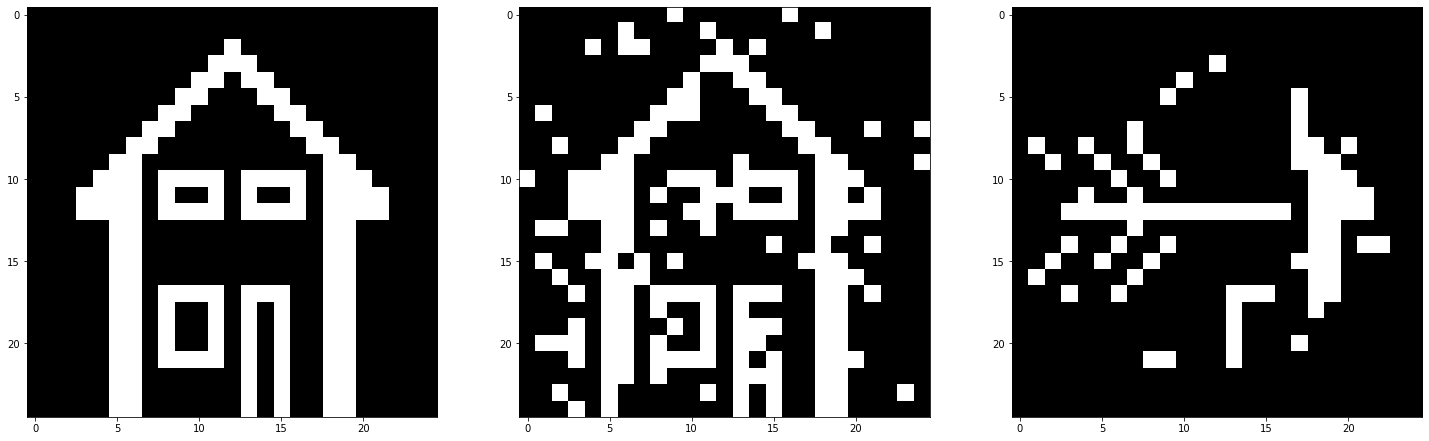

In [45]:
result_synchronous = network.recognize(t, np.copy(sample_test), 1000)
print("Accuracy synchronous: {0}".format(np.sum(sample == result_synchronous) / neurons_count_n))
visualize_result(sample, sample_test, result_synchronous, height, width)